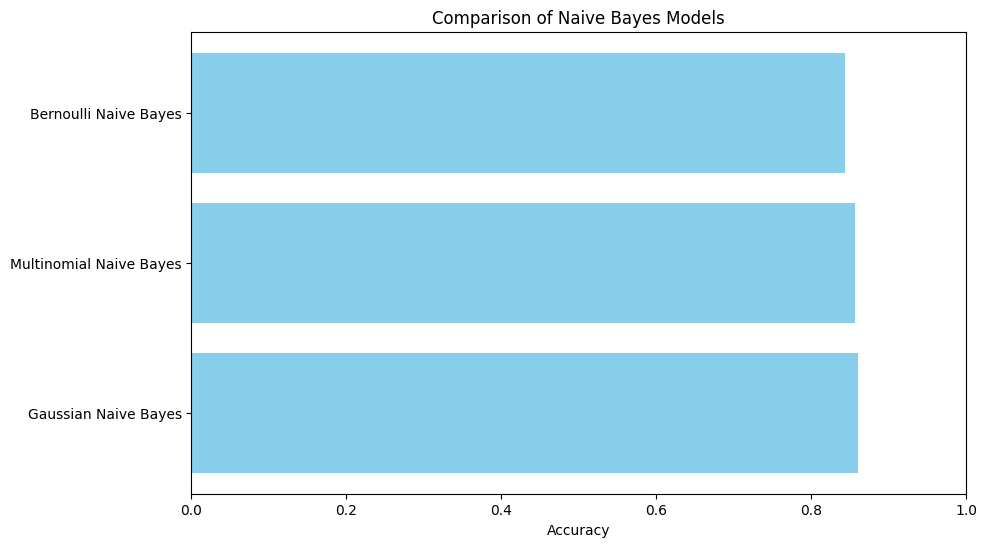

Gaussian Naive Bayes Accuracy: 0.8600
Multinomial Naive Bayes Accuracy: 0.8567
Bernoulli Naive Bayes Accuracy: 0.8433


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.preprocessing import Binarizer
from sklearn.utils import shuffle

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X, y = shuffle(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Gaussian Naive Bayes (assumes continuous features)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)

# Apply Multinomial Naive Bayes (assumes count features)
# Ensure the data contains non-negative values for MultinomialNB
X_train_mnb = np.maximum(X_train, 0)  # Replace negative values with 0
X_test_mnb = np.maximum(X_test, 0)    # Replace negative values with 0

mnb = MultinomialNB()
mnb.fit(X_train_mnb, y_train)
y_pred_mnb = mnb.predict(X_test_mnb)
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)

# Apply Bernoulli Naive Bayes (binary features)
# Binarizing the features for Bernoulli Naive Bayes
binarizer = Binarizer()
X_train_binary = binarizer.fit_transform(X_train)
X_test_binary = binarizer.transform(X_test)

bnb = BernoulliNB()
bnb.fit(X_train_binary, y_train)
y_pred_bnb = bnb.predict(X_test_binary)
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)

# Plot results
model_names = ['Gaussian Naive Bayes', 'Multinomial Naive Bayes', 'Bernoulli Naive Bayes']
accuracies = [accuracy_gnb, accuracy_mnb, accuracy_bnb]

plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Comparison of Naive Bayes Models')
plt.xlim(0, 1.0)
plt.show()

# Print accuracies
print(f"Gaussian Naive Bayes Accuracy: {accuracy_gnb:.4f}")
print(f"Multinomial Naive Bayes Accuracy: {accuracy_mnb:.4f}")
print(f"Bernoulli Naive Bayes Accuracy: {accuracy_bnb:.4f}")


朴素贝叶斯（Naive Bayes）是一种基于贝叶斯定理的概率分类算法，假设特征之间是条件独立的。它广泛用于文本分类、垃圾邮件检测、情感分析等任务。

### **朴素贝叶斯分类模型的种类**

1. **高斯朴素贝叶斯 (Gaussian Naive Bayes)**  
   假设特征的分布符合高斯（正态）分布，适用于连续特征。

2. **多项式朴素贝叶斯 (Multinomial Naive Bayes)**  
   适用于离散计数数据，通常用于文本分类（例如词频计数）。

3. **伯努利朴素贝叶斯 (Bernoulli Naive Bayes)**  
   适用于二元/布尔特征（例如文本数据中的词是否出现）。

4. **自定义贝叶斯 (Custom Naive Bayes)**  
   在特定问题中，可以根据特征的分布和条件独立性进行自定义的贝叶斯模型。

5. **Categorical Naive Bayes (类别朴素贝叶斯)**  
   类似于多项式朴素贝叶斯，但用于离散分类特征。


### **模型特点、适用场景及优缺点**

#### **1. 高斯朴素贝叶斯 (Gaussian Naive Bayes)**
- **特点**：
  - 假设特征服从高斯分布，通常用于连续数据。
  - 计算简单，训练速度快。
- **适用场景**：
  - 连续特征的数据集，如金融数据分析、医学数据分析等。
- **优点**：
  - 计算速度快，内存占用小。
  - 对小数据集具有很好的表现。
  - 不容易过拟合，尤其是在特征不多时。
- **缺点**：
  - 假设数据服从高斯分布，这可能不适用于所有数据集。
  - 对于特征之间的相关性敏感，不适合特征之间相关性较强的数据。

---

#### **2. 多项式朴素贝叶斯 (Multinomial Naive Bayes)**
- **特点**：
  - 基于多项式分布的假设，通常用于离散计数特征。
  - 常用于文本分类，特别是在词袋模型中。
- **适用场景**：
  - 文本分类、垃圾邮件检测、情感分析等任务。
  - 特征为离散计数型数据，如词频、页面点击数等。
- **优点**：
  - 对离散型特征数据表现较好，尤其是词频等特征。
  - 训练速度快，适用于大规模数据集。
- **缺点**：
  - 假设特征之间是条件独立的，在实际中可能不成立，导致模型性能下降。
  - 对于特征非常稀疏的数据，可能需要特定的优化。

---

#### **3. 伯努利朴素贝叶斯 (Bernoulli Naive Bayes)**
- **特点**：
  - 假设特征遵循伯努利分布，适用于二元特征。
  - 常用于文本分类中，特别是处理布尔特征（词是否出现）的情况。
- **适用场景**：
  - 文本数据分类，如垃圾邮件检测、情感分析等。
  - 适用于具有二元特征的数据集（如文本中某个词的出现与否）。
- **优点**：
  - 对于二元特征的数据，效果较好。
  - 计算速度快，内存消耗较小。
- **缺点**：
  - 假设特征之间是条件独立的，可能不适用于特征间相关性较强的数据。
  - 对于多类别的情况，可能不如其他模型（如多项式朴素贝叶斯）表现好。

---

#### **4. 自定义贝叶斯 (Custom Naive Bayes)**
- **特点**：
  - 适用于特定任务，用户可以根据数据的特性自定义特征分布。
  - 例如，可以根据数据的分布选择不同的分布类型（如泊松分布、正态分布等）。
- **适用场景**：
  - 数据有特殊的分布特征时，可以通过定制化模型进行建模。
  - 需要对特定问题进行优化时。
- **优点**：
  - 灵活性强，可以根据特定问题调整模型。
  - 对于不符合标准分布的数据，可以提供更好的性能。
- **缺点**：
  - 自定义模型需要对数据的分布特性有较深的理解，且可能需要更多的调参和实验。
  - 模型的可解释性可能较差。

---

### **总结**

- **适用于离散数据的情况**：如果数据是离散的计数型数据（例如词频），可以选择 `Multinomial Naive Bayes` 或 `Bernoulli Naive Bayes`。
- **适用于连续数据的情况**：如果数据是连续的，可以使用 `Gaussian Naive Bayes`，特别是当特征接近高斯分布时表现较好。
- **对于特定需求**：如果数据具有特定的分布（例如泊松分布），可以尝试自定义贝叶斯模型。

